In [16]:
import pandas as pd
url = "https://raw.githubusercontent.com/dataprofessor/data/master/delaney_solubility_with_descriptors.csv"
data = pd.read_csv(url)
data

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,logS
0,2.59540,167.850,0.0,0.000000,-2.180
1,2.37650,133.405,0.0,0.000000,-2.000
2,2.59380,167.850,1.0,0.000000,-1.740
3,2.02890,133.405,1.0,0.000000,-1.480
4,2.91890,187.375,1.0,0.000000,-3.040
...,...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000,1.144
1140,3.42130,286.114,2.0,0.333333,-4.925
1141,3.60960,308.333,4.0,0.695652,-3.893
1142,2.56214,354.815,3.0,0.521739,-3.790


In [17]:
X = data.drop("logS", axis=1)
X

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
0,2.59540,167.850,0.0,0.000000
1,2.37650,133.405,0.0,0.000000
2,2.59380,167.850,1.0,0.000000
3,2.02890,133.405,1.0,0.000000
4,2.91890,187.375,1.0,0.000000
...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000
1140,3.42130,286.114,2.0,0.333333
1141,3.60960,308.333,4.0,0.695652
1142,2.56214,354.815,3.0,0.521739


In [18]:
Y = data.iloc[:,-1] # same thing with Y = data["logS"]
Y

0      -2.180
1      -2.000
2      -1.740
3      -1.480
4      -3.040
        ...  
1139    1.144
1140   -4.925
1141   -3.893
1142   -3.790
1143   -2.581
Name: logS, Length: 1144, dtype: float64

In [19]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [20]:
model = linear_model.LinearRegression()
model.fit(X, Y)

LinearRegression()

In [21]:
ypred = model.predict(X)
ypred

array([-2.77628837, -2.38661054, -2.77190108, ..., -4.73721496,
       -4.19663007, -2.61784284])

In [23]:
# performance of the model
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean Squared Error:', mean_squared_error(Y, ypred))
print('R2 Score:', r2_score(Y, ypred))

Coefficients: [-0.74173609 -0.00659927  0.00320051 -0.42316387]
Intercept: 0.25650068309971763
Mean Squared Error: 1.0096023011483513
R2 Score: 0.770099670806285


In [28]:
print(f' LogS = {str(model.intercept_)} + ({model.coef_[0]}) LogP + ({model.coef_[1]}) MW + ({model.coef_[2]}) RB + ({model.coef_[3]}) AP ')

 LogS = 0.25650068309971763 + (-0.7417360905910642) LogP + (-0.006599268420798929) MW + (0.0032005100261398777) RB + (-0.4231638660265011) AP 


In [29]:
# visualisation
import matplotlib.pyplot as plt
import numpy as np

Text(0.5, 0, 'Experimental LogS')

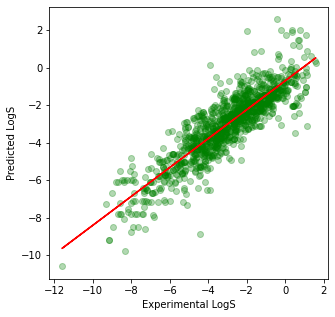

In [37]:
plt.figure(figsize=(5, 5))
plt.scatter(Y, ypred, c='green', alpha=0.3)

z = np.polyfit(Y, ypred, 1)
p = np.poly1d(z)

plt.plot(Y, p(Y), 'red')
plt.ylabel('Predicted LogS')
plt.xlabel('Experimental LogS')


In [39]:
import pickle 
pickle.dump(model, open('model.pkl', 'wb'))